## Name: Saikumar Karnakanti

## Course: Advanced Big Data and Data Mining (MSCS-634-B01)

## Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering

### Step 1: Data Preparation & Exploration

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target  # Not used for clustering but useful for evaluation

# Explore dataset
print(X.head())
print(X.info())
print(X.describe())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

### Step 2: Hierarchical Clustering
#### Agglomerative Clustering

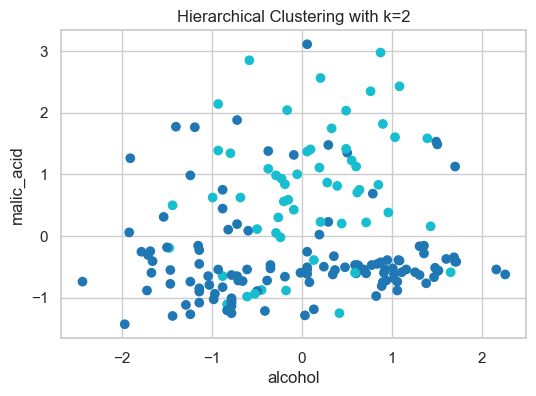

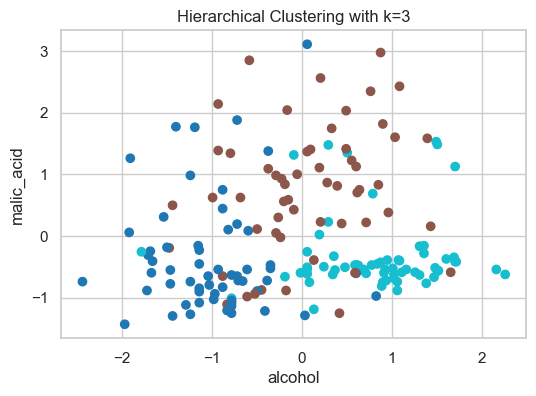

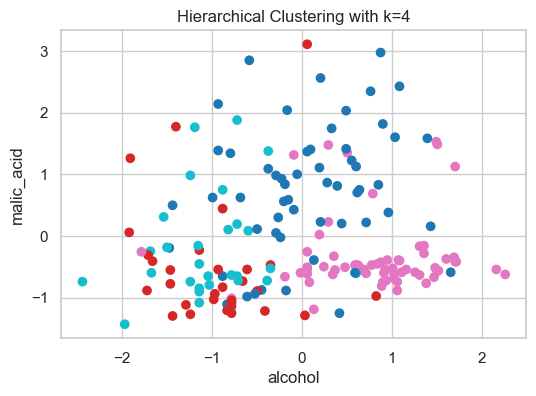

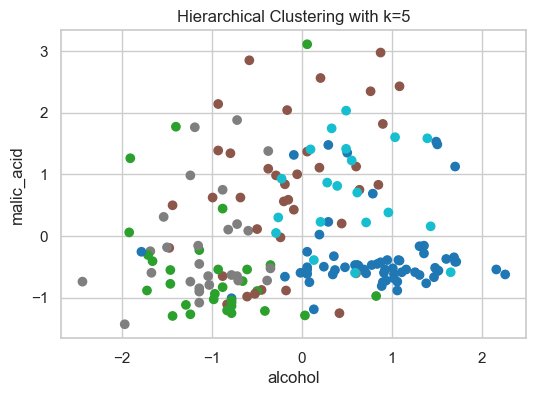

In [2]:
from sklearn.cluster import AgglomerativeClustering

# Try different numbers of clusters
for k in [2, 3, 4, 5]:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_scaled)

    plt.figure(figsize=(6,4))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='tab10')
    plt.title(f'Hierarchical Clustering with k={k}')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.show()


#### Dendrogram

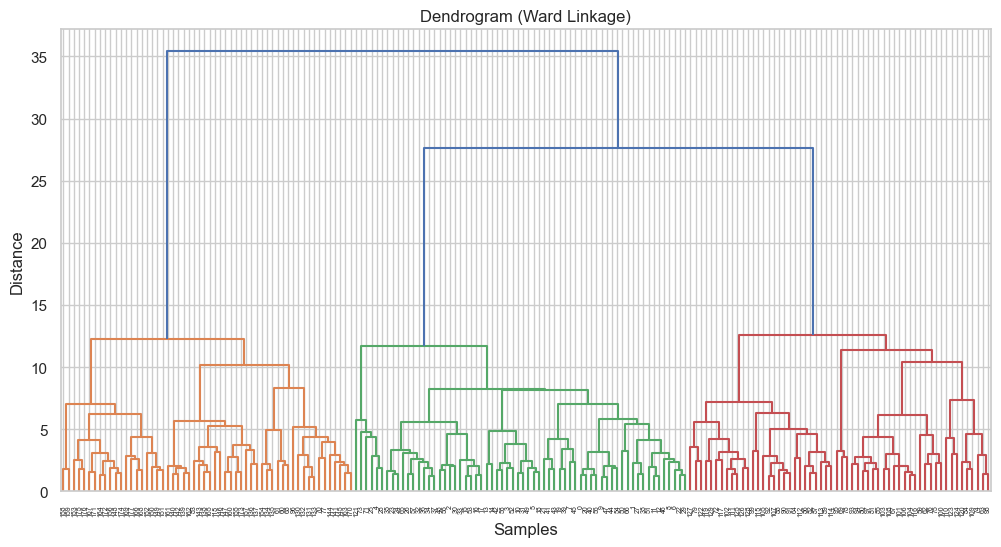

In [3]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


### Step 3: DBSCAN Clustering
#### DBSCAN Algorithm

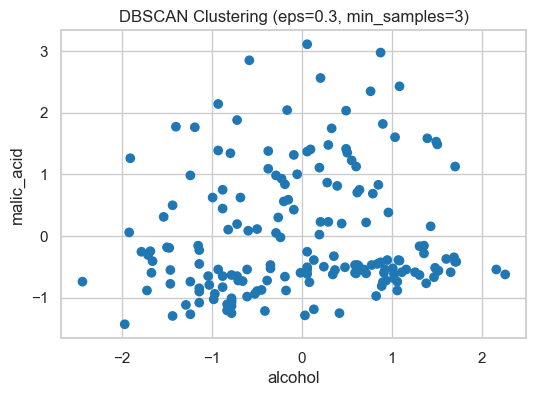


EPS=0.3, min_samples=3
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


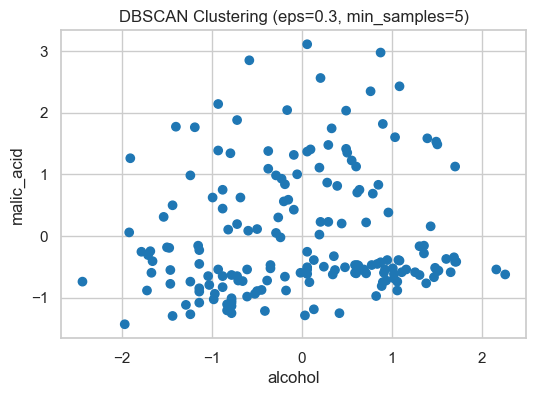


EPS=0.3, min_samples=5
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


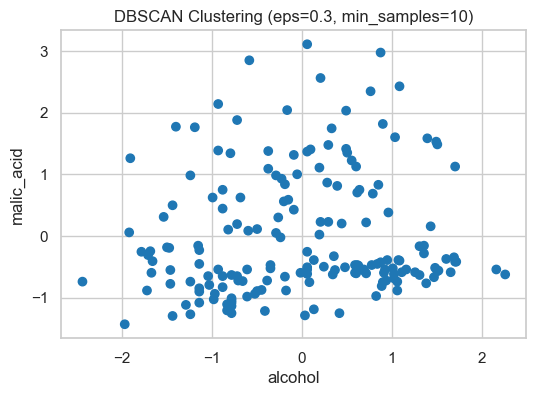


EPS=0.3, min_samples=10
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


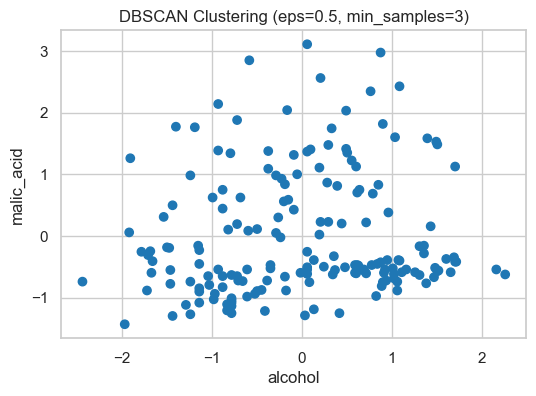


EPS=0.5, min_samples=3
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


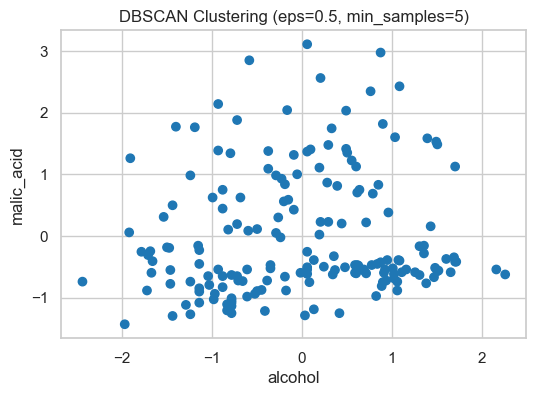


EPS=0.5, min_samples=5
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


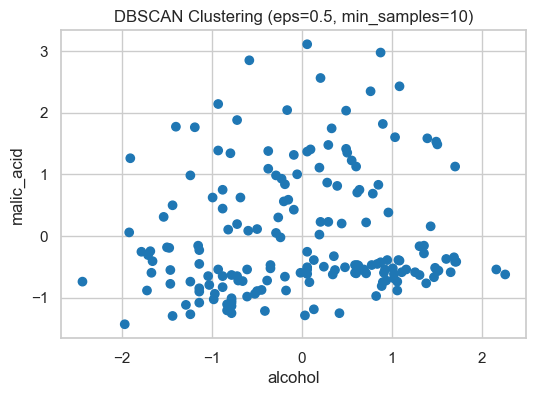


EPS=0.5, min_samples=10
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


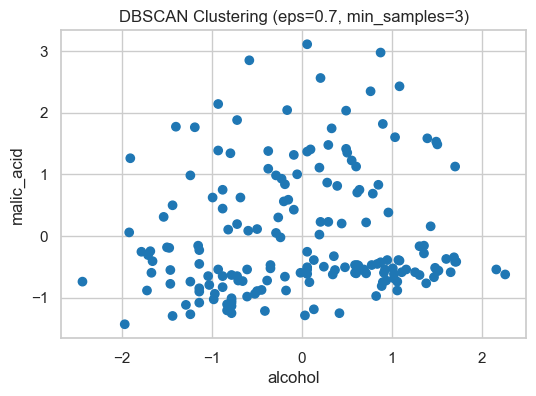


EPS=0.7, min_samples=3
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


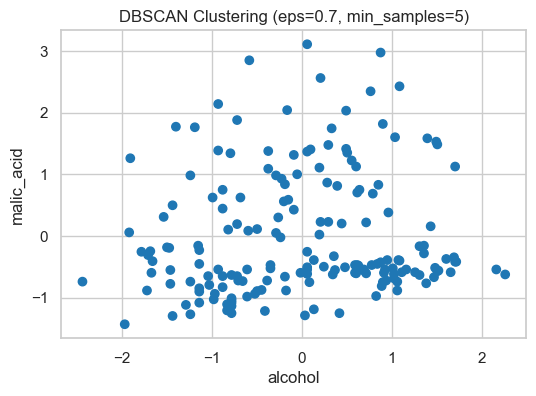


EPS=0.7, min_samples=5
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


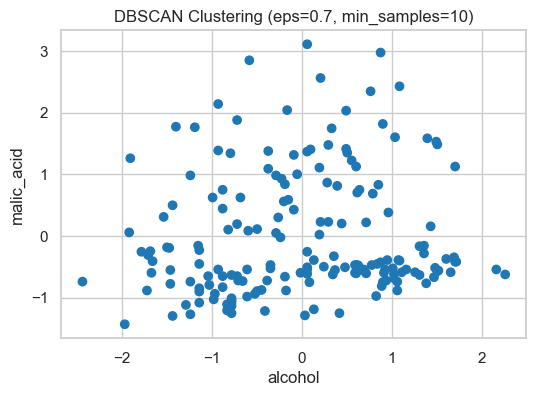


EPS=0.7, min_samples=10
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


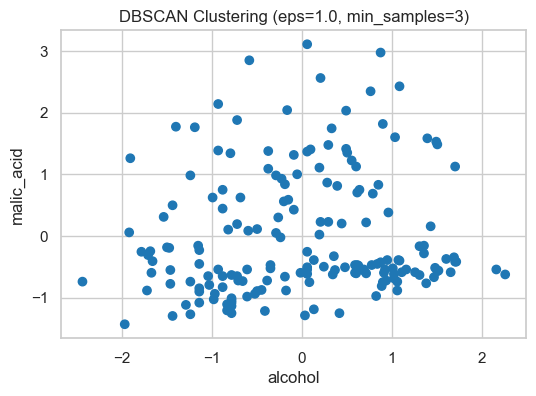


EPS=1.0, min_samples=3
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


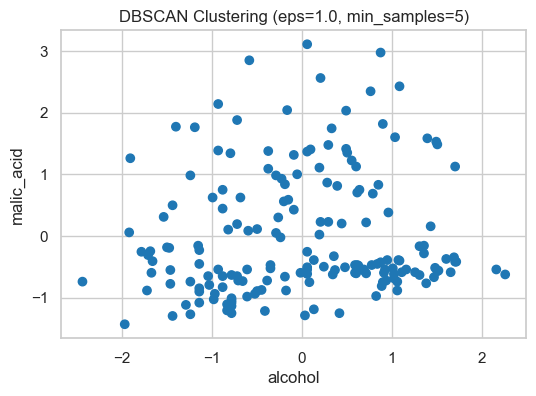


EPS=1.0, min_samples=5
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


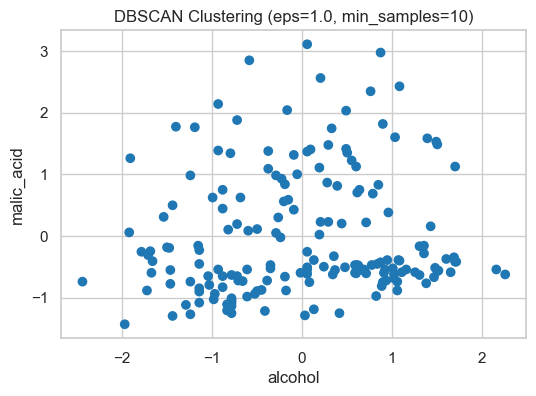


EPS=1.0, min_samples=10
Labels: {np.int64(-1)}
Silhouette Score: N/A
Homogeneity: 0.0
Completeness: 1.0


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Try different parameter combinations
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)

        plt.figure(figsize=(6,4))
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='tab10')
        plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={ms})")
        plt.xlabel(wine.feature_names[0])
        plt.ylabel(wine.feature_names[1])
        plt.show()

        # Avoid evaluation errors when DBSCAN assigns only 1 cluster
        if len(set(labels)) > 1 and -1 not in set(labels):
            sil = silhouette_score(X_scaled, labels)
        else:
            sil = "N/A"

        print(f"\nEPS={eps}, min_samples={ms}")
        print("Labels:", set(labels))
        print("Silhouette Score:", sil)
        print("Homogeneity:", homogeneity_score(y, labels))
        print("Completeness:", completeness_score(y, labels))


### Step 4: Analysis & Insights

#### Data Preparation Summary

The Wine dataset includes thirteen continuous chemical attributes describing wine samples that belong to three true categories. All features were standardized using StandardScaler before clustering. Standardization was necessary because the original features have very different scales, and clustering algorithms based on Euclidean distance would otherwise be dominated by variables with larger numeric ranges. After scaling, each feature contributes more equally to the distance calculations, improving the reliability of both hierarchical clustering and DBSCAN.

####  Hierarchical Clustering Results
**Cluster Behavior Across Different k Values**

Agglomerative hierarchical clustering with Ward linkage was applied with k equal to 2, 3, 4, and 5.
When k was set to 2, the scatter plot showed two broad groups, but with visible overlap due to dimensionality reduction to two features for visualization. Increasing k to 3 produced clearer separation and aligned more closely with the natural structure of the Wine dataset, which has three underlying wine types. At k equal to 4 and 5, the algorithm began splitting existing groups into smaller subclusters, which did not provide additional meaningful structure. This suggests that k equal to 3 gives the most coherent clustering.

**Dendrogram Interpretation**

The dendrogram generated using Ward linkage revealed several large vertical jumps, which indicate significant increases in within-cluster variance when clusters were merged. A natural horizontal cut placed just below these large jumps yields approximately three major clusters. This visual evidence supports the idea that three clusters capture the main structure of the Wine dataset. The dendrogram and the scatter plots are therefore consistent in revealing that three clusters represent a meaningful choice.

#### DBSCAN Clustering Results
**Observed Behavior Across eps and min_samples Values**

DBSCAN was tested with eps values of 0.3, 0.5, 0.7, and 1.0, along with min_samples values of 3, 5, and 10. In every tested combination, DBSCAN assigned all points to noise, producing only the label −1. The scatter plots reflected this by showing a single uniform color rather than multiple cluster regions. Because all points were considered noise, no valid silhouette score could be computed.

**Evaluation Metrics**

Homogeneity was zero for all configurations, indicating that the predicted labels failed to separate the true classes. Completeness was one for all configurations, which occurs only because every point was assigned to the same cluster label. These metrics confirm that the DBSCAN runs did not identify meaningful structure in the dataset under the chosen parameter ranges.

**Reason for DBSCAN Failure**

DBSCAN is highly sensitive to eps and min_samples. In this dataset, even after standardization, distances between neighboring points in thirteen dimensions are large relative to the eps values that were tested. As a result, no region was recognized as sufficiently dense to form a cluster. Larger eps values or dimensionality reduction using PCA would make DBSCAN more effective. A k-distance plot could also help determine an appropriate eps value instead of guessing.

#### Comparison of Methods
**Hierarchical Clustering Performance**

Hierarchical clustering successfully produced interpretable and meaningful clusters. The best performance occurred with three clusters, which aligns with the known number of wine types. The method provides additional interpretability through the dendrogram, which visually supports the chosen number of clusters.

**DBSCAN Performance**

DBSCAN did not produce useful results for any of the tested parameter values. Its strengths, such as detecting arbitrary shapes and identifying noise, did not appear in this experiment because the eps values were too small for high-dimensional standardized data.

#### Strengths and Weaknesses of Each Algorithm
**Strengths of Hierarchical Clustering**

Hierarchical clustering offers stable performance on this dataset. It provides visual interpretability through the dendrogram and does not require the selection of eps or min_samples. The results aligned naturally with the dataset’s three-class structure.

**Weaknesses of Hierarchical Clustering**

The algorithm requires choosing the number of clusters, which may not always be straightforward. It also assumes clusters are compact and spherical under Euclidean distance and can become computationally expensive for very large datasets.

**Strengths of DBSCAN**

DBSCAN does not require predefining the number of clusters. It can discover clusters of irregular shape and explicitly labels noise points, which makes it useful for density-based patterns.

**Weaknesses of DBSCAN**

DBSCAN is sensitive to the choice of eps and min_samples. In high-dimensional datasets such as this one, distances become less informative, and DBSCAN may fail unless parameters are tuned carefully. Without dimensionality reduction, DBSCAN often struggles to detect meaningful density-based structure.